### 44 Zoomer sur une image

Compléter le code du fichier `zoom.py` pour :

-   écrire une fonction `agrandit1(m,k)` qui simule un agrandissement d’une image en répétant `k` fois chaque colonne puis ligne de la matrice `m`.

-   lisser le rendu de `agrandit1` en attribuant des valeurs intermédiaires aux pixels insérées entre les pixels originaux.

In [ ]:
# Test:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import urllib

def charge_img(filename):
    """
    Entrée: filename: text (chemin d'accès au fichier)
    Enregistre l'image sous forme d'une matrice de flottants dans [0,1.].
    Renvoie cette matrice.
    """
    return (np.array(Image.open(filename))/255).tolist()

def affiche(matrice, tit=''):
    """
    Entrée: matrice: list of list of float (tit: string)
    Affiche l'image stockée par la matrice.
    Si chaque valeur de la matrice est : 
    - un float entre 0 et 1. , alors échelle de gris 0 noir, 1. blanc
    - un triplets de 3 flottants entre 0 et 1, alors couleur (r,g,b), avec (0,0,0) noir, (0,0,.5) bleu un peu sombre, (1.,1.,1.) blanc

    Attention, les valeurs sont rééchelonnées de sorte que le min est noir, le max est blanc.
    Exemples: affiche([[1.,.9],[.5,0]])
    affiche([[(.1,.8,.1),(.2,.2,.2)]])
    """
    plt.figure(1)
    plt.clf()
    plt.axis('off')
    plt.title(tit)
    plt.imshow(matrice,cmap='Greys_r')
    plt.show()

In [ ]:
def agrandit1(m,k):
    """
    Entrée: une matrice m de valeurs (la matrice représente une image), un entier k.
    Renvoie une nouvelle matrice m2 qui répète k fois chaque colonne et ligne de la matrice m pour 'agrandir' l'image.
    """
    # A compléter
    return m2


# Test:
m=[[ .1,  .2,  .3,  .4],
[ .5,  .6,  .4,  .3],
[ .9,  .8,  .3,  .5],
[ .9,  .9,  .9,  .9]]

mc=[[[x,x,x] for x in v] for v in m]

print("agrandissement par répétition :\n",agrandit1(mc,2))
img1 = agrandit1(mc,2)
img2 = agrandit2(mc,2)
affiche(mc,'image de départ')
affiche(img1,'image agrandie par répétition')

Compléter la fonction `moyenne_ponderee`. 
L'idée est la suivante:
pour chaque pixel, on va calcule un tableau `distances` et un tableau `valeurs`
- distance[i] représente la distance entre le pixel et un de ses voisins.
- valeurs[i] représente la couleur du voisin, sous forme d'un triplet de flottants entre 0 et 1.0 (r,g,b).

La fonction `moyenne_ponderee`
Notons $d_0,d_1,\dots,d_k$ les distances, $[[r_0,g_0,b_0],[r_1,g_1,b1]\dots]$ les valeurs.
La moyenne pondérée est calculée comme suit:
- si une des distances, par exemple $d_1$, est nulle (on suppose qu'il n'y en aura jamais 2 de nulles simultanément, cela n'aurait aucun sens), alors on renvoie la couleur du pixel correspondant: $[r_1,g_1,b1]$.

- sinon on renvoie le triplet $[mr,mg,mb]$ obtenu en faisant la moyenne des valeurs pondérées par la distance, c'est à dire qu'on renvoie le triplet tel que: 
$mr=\frac{(\sum_i\frac{1}{d_i}\cdot r_i)}{(\sum_i \frac{1}{d_i})}$, et similairement pour $mg$ et $mb$.

In [ ]:
def moyenne_ponderee(distances,valeurs):
    """
    Entrée: un tableau de d distances (entiers), un tableau de d pixels (triplets) de valeurs (flottants entre 0 et 1.).
    Renvoie: le triplet obtenu en faisant la moyenne des autres pixels (triplets) pondérés par leur distance.
    """
    # A compléter

# Test:
# On s'autorise à utiliser numpy pour le test :
import numpy as np
# Cas où une distance est nulle:
print(np.allclose(moyenne_ponderee([7,0], [[.7,.6,.2],[.3,.4,.5]]),[.3,.4,.5]))
# Cas où aucune distance n'est nulle:
print(np.allclose(moyenne_ponderee([1,4], [[.7,.6,.2],[.3,.4,.5]]),[0.6199999999999999, 0.5599999999999999, 0.26]))
# Si on ne veut pas utiliser numpy, voilà une expression à peu près équivalente avec sum:
print(sum([abs(moyenne_ponderee([1,4], [[.7,.6,.2],[.3,.4,.5]])[i]
               -[0.6199999999999999, 0.5599999999999999, 0.26][i]) for i in range(3)])< .0001)

Compléter la fonction `agrandit2(m,k)`. Cette fonction va multiplier les dimensions de l'image par `k`, ou presque: contrairement à la fonction agrandit1, on va uniquement insérer des pixels entre les pixels existants, donc on n'insère pas de nouveaux pixels à droite ou en bas de l'image; les dimensions de la nouvelle matrice sont donc de la forme "1 plus un multiple de `k`".
Les anciens pixels se trouvent désormais à des indices multiples de `k`, et on insère entre ces pixels de nouveaux pixels. 

La valeur des nouveaux pixels insérés entre les pixel est obtenue en prenant la moyenne des 4 pixels originaux qui les entourent, pondérée par leur distance au nouveau pixel. On utilise la distance de Manhattan, comme illustré. 
La couleur de chaque pixel (y compris les pixels originaux) sera obtenue en appliquant la fonction `moyenne_ponderee` à 4 points. Sauf que tous les pixels ne sont pas toujours entourés par 4 pixels d'origine; d'abord certains pixels sont eux-même un pixel d'origine, et ensuite certains sont alignés avec 2 pixels d'origine. Plutôt que de traiter chaque cas différemment on utilisera toujours 4 points dans la formule `moyenne_pondérée`:
 - dans le cas d'un pixel de l'image d'origine on utilisera 4 fois ce même pixel, avec une distance de 0, dans la moyenne pondérée (ce qui conservera sa valeur), 
 - dans le cas d'un pixel aligné verticalement ou horizontalement avec 2 pixels d'origine, on utilisera 2 fois chacun de ces pixels,
 - dans les autres cas on utilisera 4 pixels distincts, comme illustré.

Pour écrire méthodiquement le code demandé, on vous propose de procéder comme suit :

 - commencer par identifier les dimensions `dimx,dimy` que doit avoir l'image résultat.
 - écrire une fonction qui prend en entrée la matrice d'origine `m`, et trois entiers `i,j,k` avec `i`et `j` les coordonnées d'un pixel dans l'image agrandie d'un facteur k (donc `i<dimy` et `j<dimx` même si on ne le vérifiera pas). La fonction renverra le tableau des distances de ce pixel à ses 4 voisins, ainsi que le tableau des valeurs des 4 pixels correspondant.
 - créer la matrice en faisant appel à `moyenne_ponderee`. Le plus simple est sans doute de créer d'abord une matrice de valeurs `None` de la bonne dimension, puis lui affecter les bonnes avec une boucle imbriquée, mais vous pouvez bien sûr utiliser une compréhension à la place.

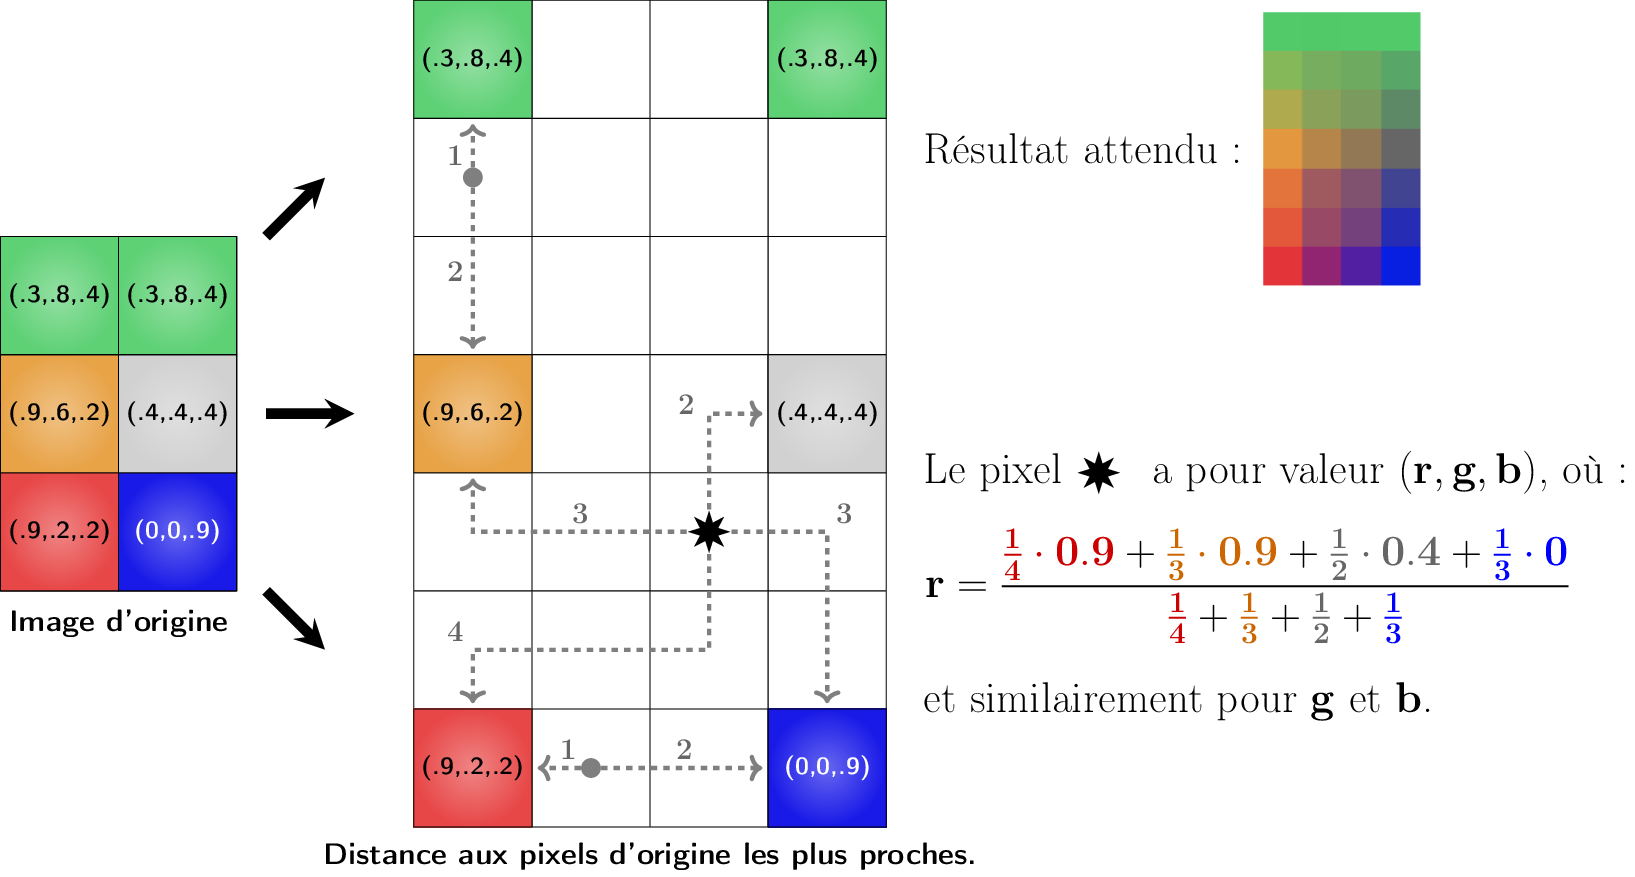

In [ ]:
def calcule_distances(m,i,j,k):
    """
    Entrée:  la matrice d'origine `m`, et trois entiers `i,j,k` avec `i` et `j` les coordonnées d'un pixel dans l'image agrandie d'un facteur k.
    Renvoie le tableau des distances de ce pixel à ses 4 voisins, ainsi que le tableau des valeurs des 4 pixels correspondant.
   
    L'ordre importe peu pour l'utilisation dans agrandit2, mais pour que le test fournit ci-dessous fonctionne correctement, il faut renvoyer les voisins dans l'ordre suivant:
    pixel en bas à gauche, pixel en haut à gauche, , pixel en haut à droite, pixel en bas à droite
    """
    return # A compléter

def agrandit2(m,k):
    """
    Entrée: la matrice d'origine m.
    Renvoie: la matrice agrandie d'un facteur k, comme définie dans l'énoncé
    """
    # A compléter


In [ ]:
# Test:
mat = [[(.3,.8,.4),(.3,.8,.4)],[(.9,.6,.2),(.4,.4,.4)],[(.9,.2,.2),(0,0,.9)]]
print(calcule_distances(mat,4,2,3) == ([3, 4, 2, 3], [(0.9, 0.6, 0.2), (0.9, 0.2, 0.2), (0.4, 0.4, 0.4), (0, 0, 0.9)])
)

affiche(mat,'image de départ')
affiche(agrandit2(mat,3),'image agrandie par interpolation')
# print(agrandit2(mat,3))

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Kingfisher-2046453.jpg/320px-Kingfisher-2046453.jpg'
img = charge_img(urllib.request.urlopen(url))
affiche(img,'image de départ')
affiche(agrandit2(img,2),'image agrandie par interpolation')